# Feature reduction (redundancy)

We are going to see if there is multicollinearity between the food variables to remove redundancy.

__We start with 37 variable sthat we can see in the image__

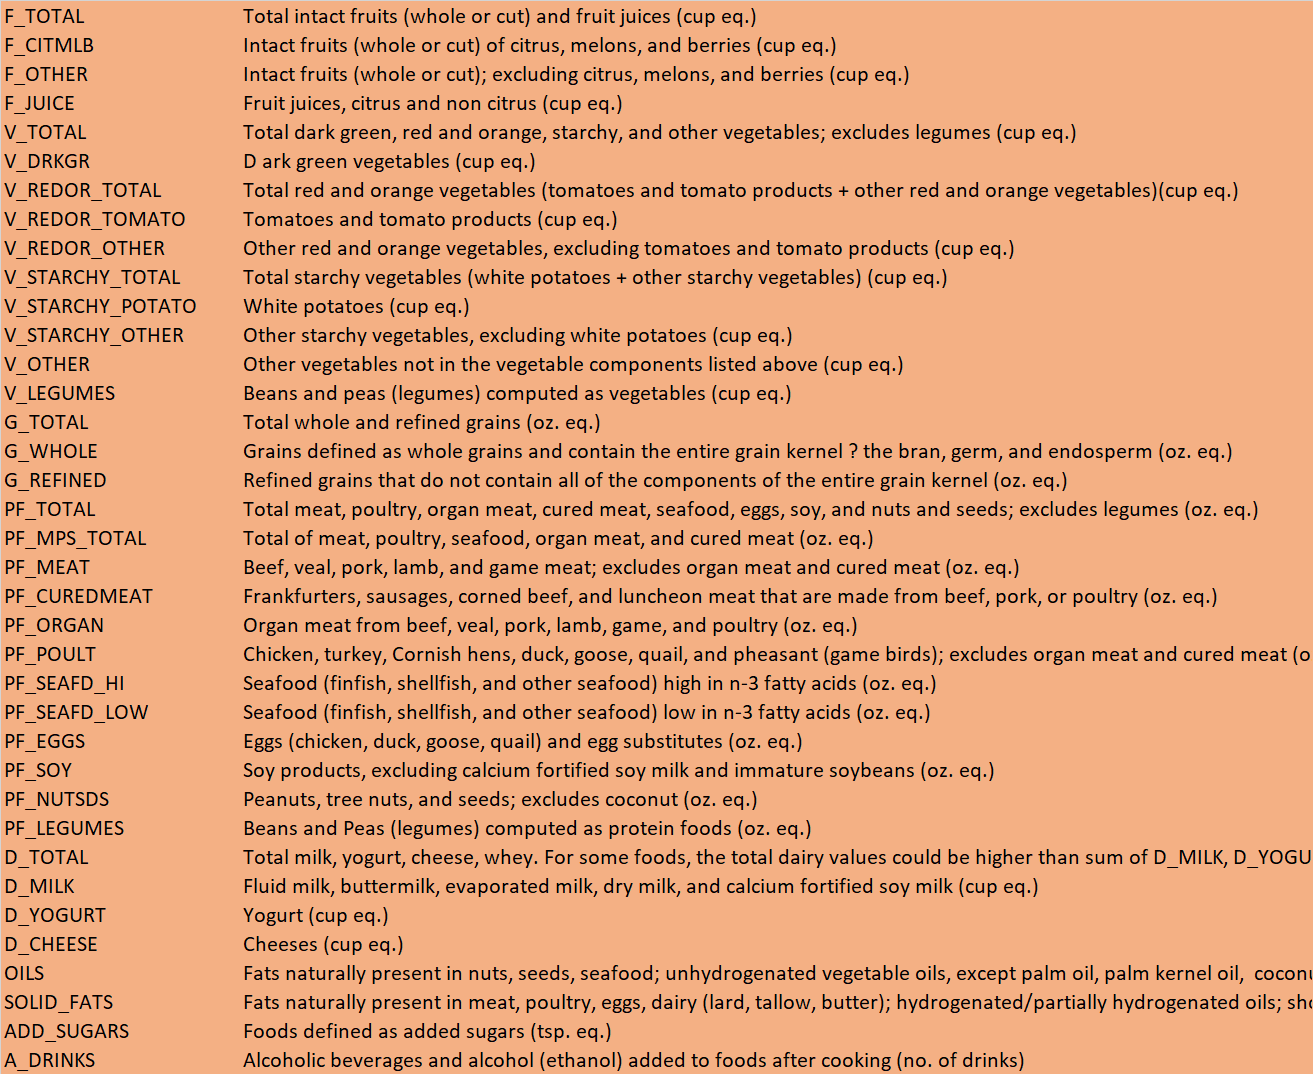

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metadatos = pd.read_csv("FoodMetadata.csv")

In [3]:
metadatos.head()

,X.SampleID,F_TOTAL,F_CITMLB,F_OTHER,F_JUICE,V_TOTAL,V_DRKGR,V_REDOR_TOTAL,V_REDOR_TOMATO,V_REDOR_OTHER,...,PF_NUTSDS,PF_LEGUMES,D_TOTAL,D_MILK,D_YOGURT,D_CHEESE,OILS,SOLID_FATS,ADD_SUGARS,A_DRINKS
0,MCT.f.0001,1.166300,0.888800,0.2775,0.0000,1.606475,0.0000,0.346900,0.174000,0.1729,...,1.0,0.0,3.265577,2.05776,0.646,0.561817,14.668870,21.795872,4.822350,1.072512
1,MCT.f.0002,0.755900,0.478400,0.2775,0.0000,1.093450,0.0000,0.037500,0.000000,0.0375,...,1.0,0.0,4.156035,2.35656,0.646,1.153475,15.886225,19.139825,4.325970,1.008000
2,MCT.f.0003,0.755900,0.478400,0.2775,0.0000,2.115100,0.0000,0.432800,0.087000,0.3458,...,1.0,0.0,2.979655,1.12608,0.646,1.207575,11.836920,17.711575,4.758330,0.000000
3,MCT.f.0004,0.671000,0.000000,0.4862,0.1848,4.621325,0.0666,0.260906,0.212906,0.0480,...,1.0,0.0,3.634460,2.15186,0.000,1.482600,55.308100,19.937800,5.917100,3.035200
4,MCT.f.0005,0.189175,0.127575,0.0000,0.0616,1.413312,0.3610,0.131712,0.131712,0.0000,...,1.0,0.0,3.379710,2.32071,0.000,1.059000,24.231213,54.613613,5.793898,3.116360


We have a column with samples IDs, we are going to store it for posterior add to the final table

In [4]:
ID = metadatos["X.SampleID"]

In [5]:
metadatos.drop("X.SampleID",axis="columns",inplace=True)

In [6]:
metadatos.head()

,F_TOTAL,F_CITMLB,F_OTHER,F_JUICE,V_TOTAL,V_DRKGR,V_REDOR_TOTAL,V_REDOR_TOMATO,V_REDOR_OTHER,V_STARCHY_TOTAL,...,PF_NUTSDS,PF_LEGUMES,D_TOTAL,D_MILK,D_YOGURT,D_CHEESE,OILS,SOLID_FATS,ADD_SUGARS,A_DRINKS
0,1.166300,0.888800,0.2775,0.0000,1.606475,0.0000,0.346900,0.174000,0.1729,1.081775,...,1.0,0.0,3.265577,2.05776,0.646,0.561817,14.668870,21.795872,4.822350,1.072512
1,0.755900,0.478400,0.2775,0.0000,1.093450,0.0000,0.037500,0.000000,0.0375,0.325500,...,1.0,0.0,4.156035,2.35656,0.646,1.153475,15.886225,19.139825,4.325970,1.008000
2,0.755900,0.478400,0.2775,0.0000,2.115100,0.0000,0.432800,0.087000,0.3458,0.582400,...,1.0,0.0,2.979655,1.12608,0.646,1.207575,11.836920,17.711575,4.758330,0.000000
3,0.671000,0.000000,0.4862,0.1848,4.621325,0.0666,0.260906,0.212906,0.0480,1.054100,...,1.0,0.0,3.634460,2.15186,0.000,1.482600,55.308100,19.937800,5.917100,3.035200
4,0.189175,0.127575,0.0000,0.0616,1.413312,0.3610,0.131712,0.131712,0.0000,0.060000,...,1.0,0.0,3.379710,2.32071,0.000,1.059000,24.231213,54.613613,5.793898,3.116360


In [7]:
metadatos.columns

Index(['F_TOTAL', 'F_CITMLB', 'F_OTHER', 'F_JUICE', 'V_TOTAL', 'V_DRKGR',
       'V_REDOR_TOTAL', 'V_REDOR_TOMATO', 'V_REDOR_OTHER', 'V_STARCHY_TOTAL',
       'V_STARCHY_POTATO', 'V_STARCHY_OTHER', 'V_OTHER', 'V_LEGUMES',
       'G_TOTAL', 'G_WHOLE', 'G_REFINED', 'PF_TOTAL', 'PF_MPS_TOTAL',
       'PF_MEAT', 'PF_CUREDMEAT', 'PF_ORGAN', 'PF_POULT', 'PF_SEAFD_HI',
       'PF_SEAFD_LOW', 'PF_EGGS', 'PF_SOY', 'PF_NUTSDS', 'PF_LEGUMES',
       'D_TOTAL', 'D_MILK', 'D_YOGURT', 'D_CHEESE', 'OILS', 'SOLID_FATS',
       'ADD_SUGARS', 'A_DRINKS'],
      dtype='object')

-----------------------------------------------

__First, we are going to remove columns that are part of other by the addition of them with others, for example F_CITMLB, F_OTHER, F_JUICE, V_DRKGR, V_REDOR_TOMATO, V_REDOR_OTHER. V_STARCHY_POTATO, V_STARCHY_OTHER, ...__

In [8]:
columnas_quitar = ["F_CITMLB", "F_OTHER", "F_JUICE", "V_DRKGR", "V_REDOR_TOMATO", "V_REDOR_OTHER", "V_STARCHY_POTATO", "V_STARCHY_OTHER", "G_WHOLE", "G_REFINED", "D_MILK", "D_CHEESE"]
metadatos = metadatos.drop(columnas_quitar,axis="columns")

In [9]:
metadatos.head()

,F_TOTAL,V_TOTAL,V_REDOR_TOTAL,V_STARCHY_TOTAL,V_OTHER,V_LEGUMES,G_TOTAL,PF_TOTAL,PF_MPS_TOTAL,PF_MEAT,...,PF_EGGS,PF_SOY,PF_NUTSDS,PF_LEGUMES,D_TOTAL,D_YOGURT,OILS,SOLID_FATS,ADD_SUGARS,A_DRINKS
0,1.166300,1.606475,0.346900,1.081775,0.177800,0.0,3.492100,6.646060,5.545260,5.54526,...,0.10080,0.0,1.0,0.0,3.265577,0.646,14.668870,21.795872,4.822350,1.072512
1,0.755900,1.093450,0.037500,0.325500,0.730450,0.0,8.217450,7.971265,6.971265,0.00000,...,0.00000,0.0,1.0,0.0,4.156035,0.646,15.886225,19.139825,4.325970,1.008000
2,0.755900,2.115100,0.432800,0.582400,1.099900,0.0,6.727000,6.927760,5.927760,0.00000,...,0.00000,0.0,1.0,0.0,2.979655,0.646,11.836920,17.711575,4.758330,0.000000
3,0.671000,4.621325,0.260906,1.054100,3.239719,0.0,8.335875,6.203520,5.167520,0.00000,...,0.03600,0.0,1.0,0.0,3.634460,0.000,55.308100,19.937800,5.917100,3.035200
4,0.189175,1.413312,0.131712,0.060000,0.860600,0.0,5.190663,7.931825,6.579075,1.81440,...,0.35275,0.0,1.0,0.0,3.379710,0.000,24.231213,54.613613,5.793898,3.116360


Removing this type of columns we end up with 25 variables.

-----------------------

Let's look at a correlation matrix for all 25 variables

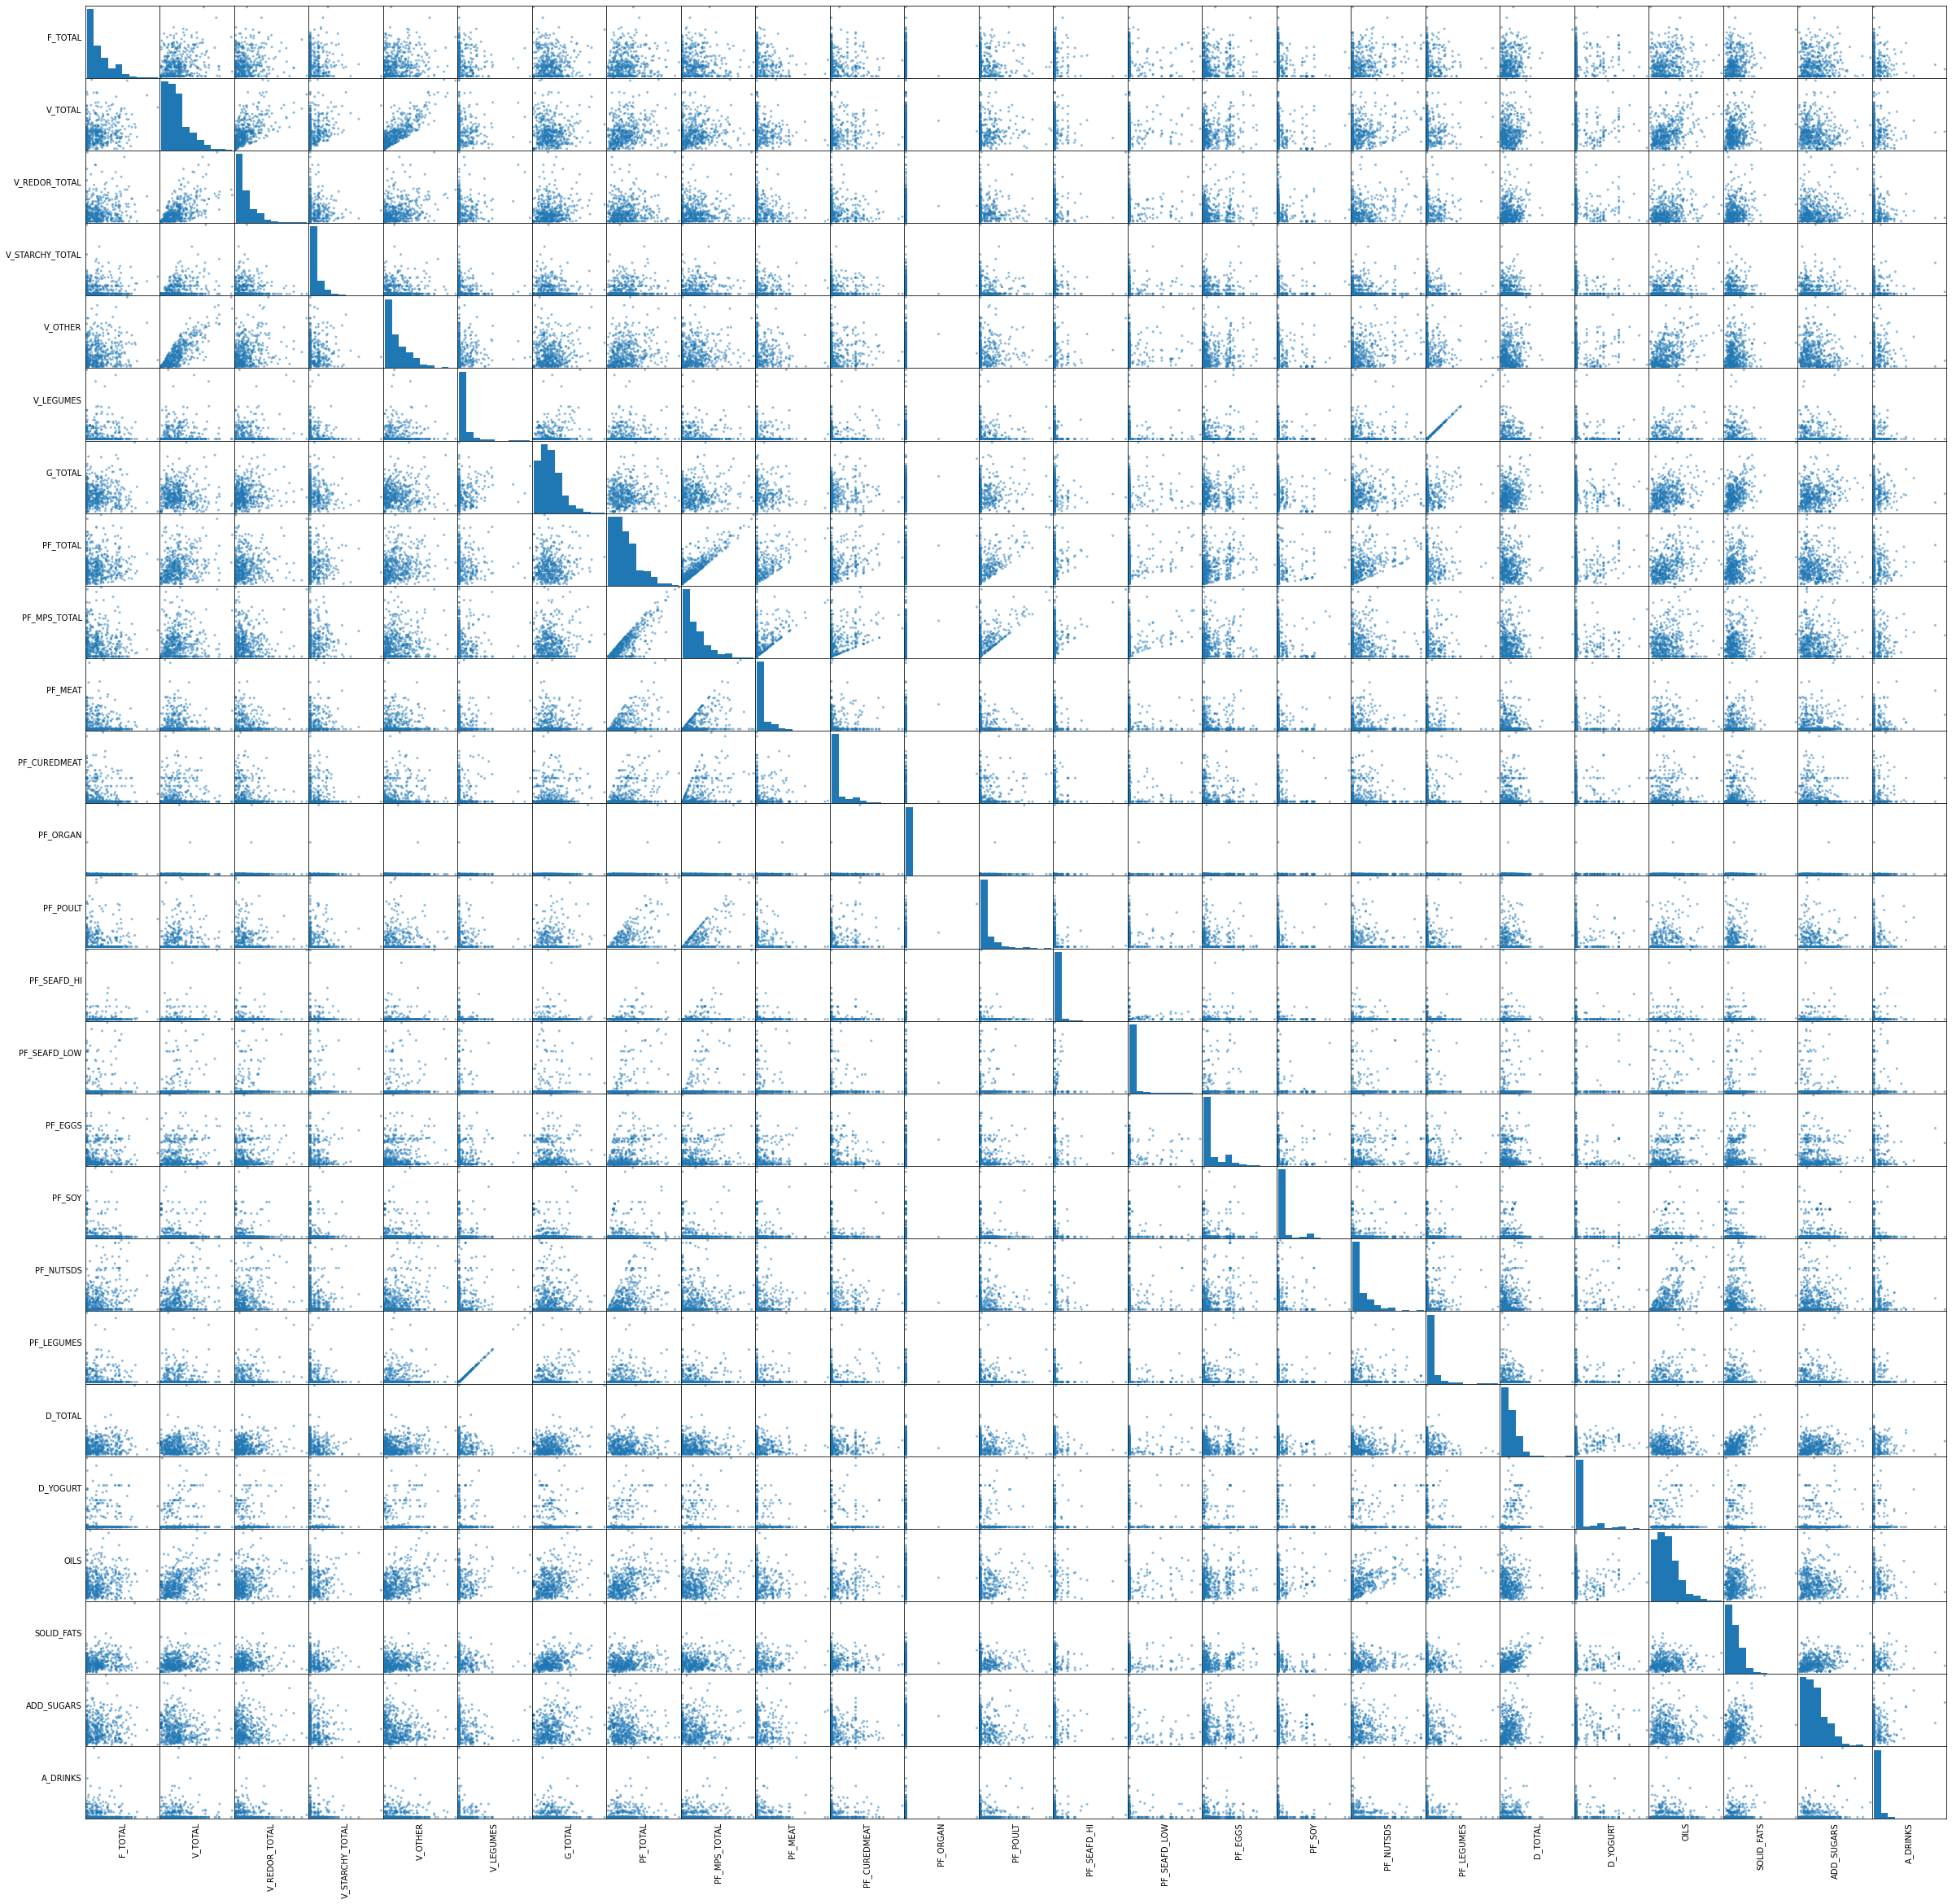

In [10]:
axs = pd.plotting.scatter_matrix(metadatos, figsize=(41, 41))
n = len(metadatos.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [11]:
tabla_correlaciones = metadatos.corr()
tabla_correlaciones.head()

,F_TOTAL,V_TOTAL,V_REDOR_TOTAL,V_STARCHY_TOTAL,V_OTHER,V_LEGUMES,G_TOTAL,PF_TOTAL,PF_MPS_TOTAL,PF_MEAT,...,PF_EGGS,PF_SOY,PF_NUTSDS,PF_LEGUMES,D_TOTAL,D_YOGURT,OILS,SOLID_FATS,ADD_SUGARS,A_DRINKS
F_TOTAL,1.000000,0.275369,0.204930,0.063989,0.188358,0.062866,0.070988,0.141411,-0.006609,-0.063127,...,0.097773,-0.167013,0.327619,0.062159,0.168386,0.162039,0.125730,0.219565,0.042926,0.000855
V_TOTAL,0.275369,1.000000,0.599936,0.331798,0.822052,0.074350,0.084076,0.291283,0.152421,-0.023512,...,0.175726,-0.185172,0.320312,0.073917,0.066630,0.155701,0.416485,0.188080,-0.129083,0.019978
V_REDOR_TOTAL,0.204930,0.599936,1.000000,0.031266,0.324098,0.181747,0.195601,0.134546,0.023071,-0.060582,...,0.133795,-0.163432,0.240488,0.181012,0.102625,0.095488,0.226770,0.209585,-0.027102,-0.047886
V_STARCHY_TOTAL,0.063989,0.331798,0.031266,1.000000,0.064854,-0.049256,-0.030679,0.105442,0.107979,0.111484,...,0.106485,-0.066500,-0.002132,-0.048702,-0.064418,-0.051298,0.128798,0.032809,-0.066522,0.060816
V_OTHER,0.188358,0.822052,0.324098,0.064854,1.000000,0.053605,0.110227,0.251377,0.118498,-0.013427,...,0.126131,-0.131195,0.302583,0.052992,0.059832,0.164861,0.415113,0.158056,-0.124839,0.011222


<AxesSubplot:>

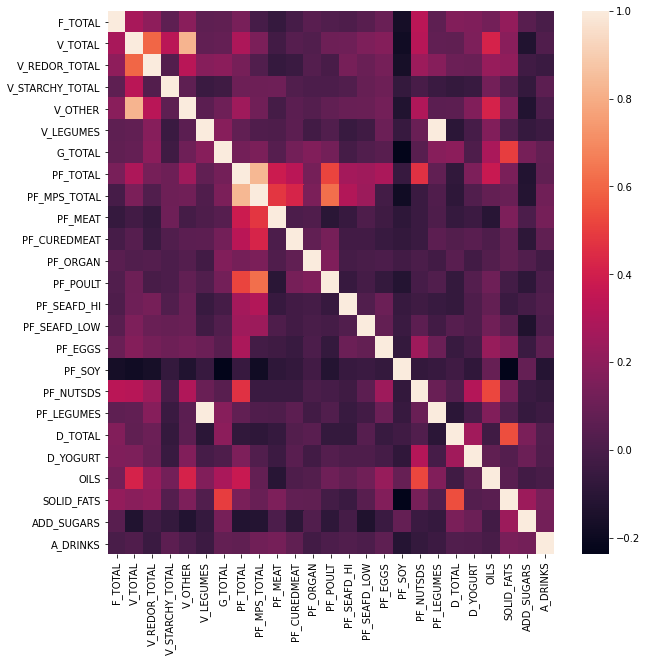

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(metadatos.corr(),xticklabels=True, yticklabels=True)

In [15]:
#Correlation over 0.5
for columna in tabla_correlaciones.columns:
    print(str(columna)+": "+str(tabla_correlaciones[abs(tabla_correlaciones[columna])>0.5].shape[0]-1))

F_TOTAL: 0
V_TOTAL: 2
V_REDOR_TOTAL: 1
V_STARCHY_TOTAL: 0
V_OTHER: 1
V_LEGUMES: 1
G_TOTAL: 0
PF_TOTAL: 2
PF_MPS_TOTAL: 2
PF_MEAT: 0
PF_CUREDMEAT: 0
PF_ORGAN: 0
PF_POULT: 2
PF_SEAFD_HI: 0
PF_SEAFD_LOW: 0
PF_EGGS: 0
PF_SOY: 0
PF_NUTSDS: 1
PF_LEGUMES: 1
D_TOTAL: 1
D_YOGURT: 0
OILS: 1
SOLID_FATS: 1
ADD_SUGARS: 0
A_DRINKS: 0


We can see that there are not so many that correlate positively or negatively with other variables, but even so, it is not a very strong correlation, so let's start by removing redundancies that have a much larger correlation.

------------------------------------

__Values >0.9__

In [23]:
for columna in tabla_correlaciones.columns:
    print(str(columna)+": "+str(tabla_correlaciones[abs(tabla_correlaciones[columna])>0.9].shape[0]-1))

F_TOTAL: 0
V_TOTAL: 0
V_REDOR_TOTAL: 0
V_STARCHY_TOTAL: 0
V_OTHER: 0
V_LEGUMES: 1
G_TOTAL: 0
PF_TOTAL: 0
PF_MPS_TOTAL: 0
PF_MEAT: 0
PF_CUREDMEAT: 0
PF_ORGAN: 0
PF_POULT: 0
PF_SEAFD_HI: 0
PF_SEAFD_LOW: 0
PF_EGGS: 0
PF_SOY: 0
PF_NUTSDS: 0
PF_LEGUMES: 1
D_TOTAL: 0
D_YOGURT: 0
OILS: 0
SOLID_FATS: 0
ADD_SUGARS: 0
A_DRINKS: 0


With more than 0.9 we only have correlated V_LEGUMES and PF_LEGUMES, which makes sense since some are composed as vegetables and another as a source of vegetables. We will remove __PF_LEGUMES__.

In [29]:
metadatos_relacionados = metadatos.drop("PF_LEGUMES",axis="columns") 
#Asi tenemos los dtos originales y una copia con los filtrados

In [30]:
len(metadatos_relacionados.columns)

24

----------------------------

__Values >0.8__

In [31]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[abs(tabla_relac[columna])>0.8].shape[0]-1))

F_TOTAL: 0
V_TOTAL: 1
V_REDOR_TOTAL: 0
V_STARCHY_TOTAL: 0
V_OTHER: 1
V_LEGUMES: 0
G_TOTAL: 0
PF_TOTAL: 1
PF_MPS_TOTAL: 1
PF_MEAT: 0
PF_CUREDMEAT: 0
PF_ORGAN: 0
PF_POULT: 0
PF_SEAFD_HI: 0
PF_SEAFD_LOW: 0
PF_EGGS: 0
PF_SOY: 0
PF_NUTSDS: 0
D_TOTAL: 0
D_YOGURT: 0
OILS: 0
SOLID_FATS: 0
ADD_SUGARS: 0
A_DRINKS: 0


We have 4 variables with a higher correlation than 0.8:
 - **V_TOTAL (1)**: V_OTHER (0.82)
 - **V_OTHER (1)**: V_TOTAL (0.82)
 - **PF_TOTAL (1)**: PF_MPS_TOTAL (0.83)
 - **PF_MPS_TOTAL (1)**: PF_TOTAL (0.83)

From these 4, we are __removing V_OTHER and PF_MPS_TOTAL__

In [34]:
metadatos_relacionados = metadatos_relacionados.drop(["V_OTHER","PF_MPS_TOTAL"],axis="columns")
len(metadatos_relacionados.columns)

22

-------------------------

__Values >0.7__

In [36]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[abs(tabla_relac[columna])>0.7].shape[0]-1))

F_TOTAL: 0
V_TOTAL: 0
V_REDOR_TOTAL: 0
V_STARCHY_TOTAL: 0
V_LEGUMES: 0
G_TOTAL: 0
PF_TOTAL: 0
PF_MEAT: 0
PF_CUREDMEAT: 0
PF_ORGAN: 0
PF_POULT: 0
PF_SEAFD_HI: 0
PF_SEAFD_LOW: 0
PF_EGGS: 0
PF_SOY: 0
PF_NUTSDS: 0
D_TOTAL: 0
D_YOGURT: 0
OILS: 0
SOLID_FATS: 0
ADD_SUGARS: 0
A_DRINKS: 0


We do not remove more variables because we do not have a relationship over 0.7

---------------

__Values >0.6__

In [38]:
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[abs(tabla_relac[columna])>0.6].shape[0]-1))

F_TOTAL: 0
V_TOTAL: 0
V_REDOR_TOTAL: 0
V_STARCHY_TOTAL: 0
V_LEGUMES: 0
G_TOTAL: 0
PF_TOTAL: 0
PF_MEAT: 0
PF_CUREDMEAT: 0
PF_ORGAN: 0
PF_POULT: 0
PF_SEAFD_HI: 0
PF_SEAFD_LOW: 0
PF_EGGS: 0
PF_SOY: 0
PF_NUTSDS: 0
D_TOTAL: 0
D_YOGURT: 0
OILS: 0
SOLID_FATS: 0
ADD_SUGARS: 0
A_DRINKS: 0


------------------

We have discarded some variables going from 37 variables to 22.

Let's see which are the variables to use for the tunning of the model parameters.

In [50]:
metadatos_relacionados.columns

Index(['F_TOTAL', 'V_TOTAL', 'V_REDOR_TOTAL', 'V_STARCHY_TOTAL', 'V_LEGUMES',
       'G_TOTAL', 'PF_TOTAL', 'PF_MEAT', 'PF_CUREDMEAT', 'PF_ORGAN',
       'PF_POULT', 'PF_SEAFD_HI', 'PF_SEAFD_LOW', 'PF_EGGS', 'PF_SOY',
       'PF_NUTSDS', 'D_TOTAL', 'D_YOGURT', 'OILS', 'SOLID_FATS', 'ADD_SUGARS',
       'A_DRINKS'],
      dtype='object')